# Optimal Control of Superconducting Qubit Gates

### $\hbar =1$

In [203]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate, optimize

## Definition of the Optimal Control functions

$J_{gate} = 1-\frac{1}{N_0^2} |Tr(U_t^\dagger U(T))|^2$, where $U_t$ is the target gate and $U(T)$ is the numerically computed gate <br>
$J_{gate}$ is the function to be minimized

In [204]:
def J_gate(U_target,U_T):
    """ Function to be minimized in optimal control """
    
    N0 = U_target.shape[0]
    J_g = 1-((1/(N0*N0)) * (np.abs(np.trace(np.matmul(np.conjugate(np.transpose(U_target)), U_T))))**2)
    
    return J_g

## Optimal Control test

In [43]:
# N = dimensions of the control landscape
N = 10

In [44]:
def paraboloid(X, par):
    """ multi-dimensional paraboloid
    
    X: function variable
    par: function parameters """
    
    s = 0
    for j in range(len(X)):
        s += (X[j]-par[j])**2
    
    return s

In [4]:
x0 = np.random.rand(N) # starting point
print('x_0 = ', x0)
xmin = np.random.rand(N) # minimum of the parabola
print('x_min = ',xmin)

# minimize with respect to those parameters
optimize.minimize(paraboloid, x0, xmin, method='Powell')

x_0 =  [0.75708804 0.61588411 0.57331957 0.00378257 0.52206004 0.30750428
 0.85407152 0.31631749 0.78990295 0.1493605 ]
x_min =  [0.59125594 0.23075211 0.12309151 0.66502685 0.63769236 0.75136719
 0.89688451 0.0852138  0.07467773 0.20812226]


   direc: array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])
     fun: 3.697785493223493e-32
 message: 'Optimization terminated successfully.'
    nfev: 172
     nit: 2
  status: 0
 success: True
       x: array([0.59125594, 0.23075211, 0.12309151, 0.66502685, 0.63769236,
       0.75136719, 0.89688451, 0.0852138 , 0.07467773, 0.20812226])

## Definition of the one-qubit Hamiltonians

Unperturbed Hamiltonian $H = -\frac{1}{2} B_x \sigma_x - \frac{1}{2} B_z \sigma_z $

Perturbed Hamiltonian $H = -\frac{1}{2} B_x \sigma_x - \frac{1}{2} B_z \sigma_z + \alpha \sigma_x + \beta \sigma_z$

In [205]:
# define Pauli matrices
sigmax = np.array([[0, 1], [1, 0]])
sigmaz = np.array([[1, 0], [0, -1]])


def H1Q_noisy(t,Y,Bx,Bz,alpha,beta):
    
    """ Perturbed one-qubit Hamiltonian
    
        t: time dependence of the function
        Y: function variable
        Bx,Bz,alpha,beta: function parameters """
    
    S = (-0.5*Bx+alpha)*np.matmul(sigmax, Y) + (-0.5*Bz+beta)*np.matmul(sigmaz, Y)
    return S




def H1Q(t,Y,Bx,Bz):
    
    """ Unperturbed one-qubit Hamiltonian
    
        t: time dependence of the function
        Y: function variable
        Bx,Bz: function parameters """
    
    return H1Q_noisy(t,Y,Bx,Bz,0.0,0.0)



def H1Q_noisy_divI(t,Y,Bx,Bz,alpha,beta):
    
    """ Utility function to be used in time evolution 
        described by Schroedinger equation """
    
    return H1Q_noisy(t,Y,Bx,Bz,alpha,beta)/(0.0+1.0j)



def H1Q_divI(t,Y,Bx,Bz):
    
    """ Utility function to be used in time evolution 
        described by Schroedinger equation """
    
    return H1Q_noisy_divI(t,Y,Bx,Bz,0.0,0.0)

## Unperturbed NOT gate

In [206]:
# integrate the time-dependent Schrodinger equation for the two base states

# initializations
BX = 1.0
BZ = 0.0
ket0 = np.array([1.0+0.0j,0.0+0.0j])
ket1 = np.array([0.0+0.0j,1.0+0.0j])

# RungeKutta8 time integration
sol = integrate.solve_ivp(H1Q_divI, t_span=(0,(np.pi/BX)), y0=ket0, args=(BX,BZ), method='DOP853')
ket0_t = sol.y[:,-1]
ket0_t /= np.linalg.norm(ket0_t)

sol = integrate.solve_ivp(H1Q_divI, t_span=(0,(np.pi/BX)), y0=ket1, args=(BX,BZ), method='DOP853')
ket1_t = sol.y[:,-1]
ket1_t /= np.linalg.norm(ket1_t)

# matrix representation of the ideal NOT gate
idealNOT = np.array([ket0_t,ket1_t])
print(idealNOT)

# compute fidelity of the ideal NOT gate
J = J_gate(np.array([[0+0.0j,1+0.0j],[1+0.0j,0+0.0j]]),idealNOT)
print("J_ideal = ", J)

[[6.2156839e-08+0.j 0.0000000e+00+1.j]
 [0.0000000e+00+1.j 6.2156839e-08+0.j]]
J_ideal =  3.774758283725532e-15


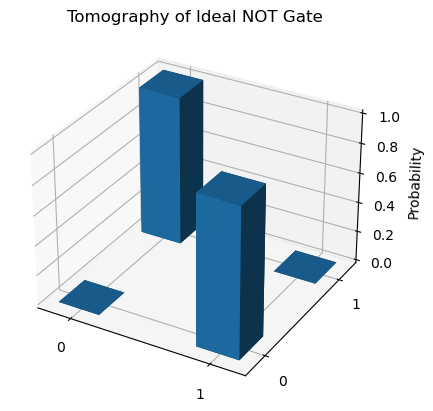

In [207]:
# show 3D histogram of the ideal NOT gate
d = 0.15

fig = plt.figure(clear=True)
ax = fig.add_subplot(projection='3d')

plt.xticks(ticks=[0,1], labels=[0,1])
plt.yticks(ticks=[0,1], labels=[0,1])


ax.bar3d(x=np.array([0-d,0-d,1-d,1-d]), y=np.array([0-d,1-d,0-d,1-d]), z=np.zeros(4),
         dx=2*d, dy=2*d, dz=np.abs(idealNOT).reshape(4))

plt.xlabel('')
plt.ylabel('')
ax.set_zlabel('Probability')
plt.title("Tomography of Ideal NOT Gate")
plt.show()
#fig.savefig('images/idealNOT.pdf')

## Perturbed NOT gate

In [208]:
# integrate the time-dependent Schrodinger equation for the two base states

# initializations
BX = 1.0
BZ = 0.0
ALPHA = 0.0
BETA = 0.2*BX
ket0 = np.array([1+0.0j,0+0.0j])
ket1 = np.array([0+0.0j,1+0.0j])

# RungeKutta8 time integration
sol = integrate.solve_ivp(H1Q_noisy_divI, t_span=(0,(np.pi/BX)), y0=ket0, args=(BX,BZ,ALPHA,BETA), method='DOP853')
ket0_t = sol.y[:,-1]
ket0_t /= np.linalg.norm(ket0_t)

sol = integrate.solve_ivp(H1Q_noisy_divI, t_span=(0,(np.pi/BX)), y0=ket1, args=(BX,BZ,ALPHA,BETA), method='DOP853')
ket1_t = sol.y[:,-1]
ket1_t /= np.linalg.norm(ket1_t)

# matrix representation of the perturbed NOT gate
pertNOT = np.array([ket0_t,ket1_t])
print(pertNOT)

# compute fidelity of the perturbed NOT gate
J = J_gate(np.array([[0+0.0j,1+0.0j],[1+0.0j,0+0.0j]]),pertNOT)
print("J_pert = ", J)

[[-1.20707906e-01-0.36867509j  3.18038096e-16+0.92168773j]
 [-3.18038096e-16+0.92168773j -1.20707906e-01+0.36867509j]]
J_pert =  0.15049172300289793


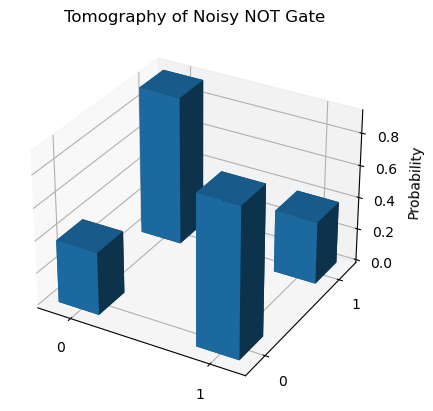

In [209]:
# show 3D histogram of the perturbed NOT gate
d = 0.15

fig = plt.figure(clear=True)
ax = fig.add_subplot(projection='3d')

plt.xticks(ticks=[0,1], labels=[0,1])
plt.yticks(ticks=[0,1], labels=[0,1])


ax.bar3d(x=np.array([0-d,0-d,1-d,1-d]), y=np.array([0-d,1-d,0-d,1-d]), z=np.zeros(4),
         dx=2*d, dy=2*d, dz=np.abs(pertNOT).reshape(4))

plt.xlabel('')
plt.ylabel('')
ax.set_zlabel('Probability')
plt.title("Tomography of Noisy NOT Gate")
plt.show()
#fig.savefig('images/pertNOT.pdf')

## Optimal control of perturbed NOT gate
The control amplitudes are in the base of $\sigma_x$ <br>
freq$_{MAX}$ is chosen such that freq$_{MAX}=\frac{2\pi Nbe}{\tau}$, where $\tau$ is the lenght of the pulse <br>
Optimized Perturbed Hamiltonian $H = -\frac{1}{2} B_x \sigma_x - \frac{1}{2} B_z \sigma_z + \alpha \sigma_x + \beta \sigma_z + B_x \sum_{i=1}^{Nbe} [A_i \sin(\omega_i t) + B_i \cos(\omega_i t)]\ \sigma_x$

In [210]:
def H1Q_noisy_OC(t,Y,Bx,Bz,alpha,beta,freqq,ampp):
    
    """ Perturbed one-qubit Hamiltonian with Optimal Control
    
        t: time dependence of the function
        Y: function variable
        Bx,Bz,alpha,beta: function parameters
        freqq: OC frequencies
        ampp: OC amplitudes """
    
    global BX
    
    cx=0
    for k in range(freqq.shape[0]):
        cx += ampp[2*k]*np.sin(freqq[k]*t) + ampp[2*k+1]*np.cos(freqq[k]*t)
    
    S = H1Q_noisy(t,Y,Bx,Bz,alpha,beta) + BX*cx*np.matmul(sigmax, Y)
        
    return S



def H1Q_noisy_OC_divI(t,Y,Bx,Bz,alpha,beta,freqq,ampp):
    
    """ Utility function to be used in time evolution 
        described by Schroedinger equation """
    
    return H1Q_noisy_OC(t,Y,Bx,Bz,alpha,beta,freqq,ampp)/(0.0+1.0j)

In [211]:
def J1Q_OC(ampp, par):
    """ This is the function to be minimized in the one-qubit Optimal-Control part
        It takes care of the time integration and gives as output a number between 0 and 1
        
        ampp: function variables
        par: function parameters = (Bx,Bz,alpha,beta,freq1,...freqN) """

    # initializations
    BX = par[0]
    BZ = par[1]
    ALPHA = par[2]
    BETA = par[3]
    FREQ = par[4:]
    
    TAU = np.pi/BX
    
    ket0_t = np.array([1+0.0j,0+0.0j])
    ket1_t = np.array([0+0.0j,1+0.0j])

    # RungeKutta8 time integration
    sol = integrate.solve_ivp(H1Q_noisy_OC_divI, t_span=(0,TAU), y0=ket0_t, args=(BX,BZ,ALPHA,BETA,FREQ,ampp), method='DOP853')
    ket0_t = sol.y[:,-1]
    ket0_t /= np.linalg.norm(ket0_t)
    
    sol = integrate.solve_ivp(H1Q_noisy_OC_divI, t_span=(0,TAU), y0=ket1_t, args=(BX,BZ,ALPHA,BETA,FREQ,ampp), method='DOP853')
    ket1_t = sol.y[:,-1]
    ket1_t /= np.linalg.norm(ket1_t)
    
    
    # compute fidelity of the perturbed NOT gate
    J = J_gate(np.array([[0+0.0j,1+0.0j],[1+0.0j,0+0.0j]]),np.array([ket0_t,ket1_t]))
    global J1Q_record
    J1Q_record = np.append(J1Q_record, J)
    
    return J

In [236]:
# initialize frequencies range and number of control amplitudes
Nbe = 3
print("number of pulses = ", Nbe)
freqMAX = 2*np.pi*Nbe/(np.pi/BX)
print("max frequency (a.u.) = ", freqMAX)

# find Nbe random frequencies in the range
freq = np.array([])
for k in range(Nbe):
    wl = np.around(((freqMAX/Nbe)*(k+np.random.rand())), decimals=6)
    freq = np.append(freq, wl)
    
print("frequencies chosen = ", freq)
print()


# initialize control amplitudes in the form [sin1,cos1,sin2,cos2,....]
ampl = np.around((np.random.random_sample(4*Nbe) - 0.5), decimals=8)
print("initialization amplitudes = ")
print(ampl)

number of pulses =  3
max frequency (a.u.) =  6.0
frequencies chosen =  [1.699312 2.323512 4.379676]

initialization amplitudes = 
[ 0.46674998  0.0307774  -0.45508347  0.21667098 -0.27533977 -0.24374805
  0.49984105 -0.04532049  0.16426941  0.1146749  -0.40979604 -0.15521052]


In [237]:
# create a record to store all the values assumed by J in the optimization
J1Q_record = np.array([])


# start optimization

# manipulate args array
T=np.append([BX,BZ,ALPHA,BETA],freq)

# minimize with respect to those parameters
opt = optimize.minimize(J1Q_OC, x0=ampl, args=T, method='Nelder-Mead')
print(opt)
print()
opt_ampl = opt.x
print(opt_ampl)

 final_simplex: (array([[-0.6409958 ,  0.07863143,  1.02702521,  0.55825046, -0.26838556,
        -0.77338415,  0.46519599, -0.05154937,  0.21225749,  0.27373031,
        -0.03235351, -0.02209567],
       [-0.64098177,  0.07863057,  1.02703703,  0.55823445, -0.26845502,
        -0.77335702,  0.46526825, -0.05154666,  0.21223767,  0.27372822,
        -0.03234507, -0.02209362],
       [-0.64099645,  0.07863101,  1.02700425,  0.5582461 , -0.26839566,
        -0.77338737,  0.46521777, -0.05154841,  0.21225142,  0.2737297 ,
        -0.03234781, -0.0220924 ],
       [-0.64099538,  0.07863084,  1.02700539,  0.55824506, -0.26839591,
        -0.77338916,  0.46522231, -0.05154829,  0.21225258,  0.27373007,
        -0.03234484, -0.02209191],
       [-0.64099756,  0.07863118,  1.02704894,  0.55823619, -0.2684643 ,
        -0.77335871,  0.46526708, -0.05154631,  0.21223713,  0.27372894,
        -0.03234129, -0.02209153],
       [-0.64099481,  0.07863123,  1.02698938,  0.55825691, -0.2683396 ,
     

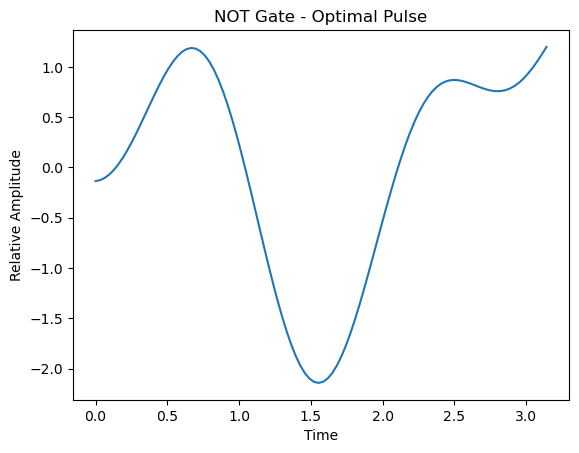

In [240]:
# show optimal pulse
x = np.linspace(0, np.pi/BX, 100)

y = np.zeros(100)

for k in range(freq.shape[0]):
    y_buff = opt_ampl[2*k]*np.sin(freq[k]*x)
    y = y + y_buff
    y_buff = opt_ampl[2*k+1]*np.cos(freq[k]*x)
    y = y + y_buff
        
fig = plt.figure(clear=True) 
plt.plot(x, y, label='optimal')
plt.xlabel('Time')
plt.ylabel('Relative Amplitude')
plt.title("NOT Gate - Optimal Pulse")
plt.show()
fig.savefig('images/NOTpulse.pdf')

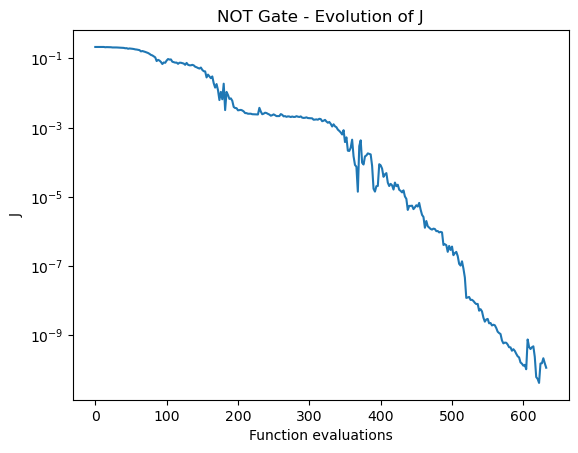

In [241]:
# choose step of visualization
st = 2

# show J evolution over iterations
x = np.arange(0,len(J1Q_record),st)

fig = plt.figure(clear=True) 
plt.yscale('log')
plt.plot(x, J1Q_record[::st], label='optimal')
plt.xlabel('Function evaluations')
plt.ylabel('J')
plt.title("NOT Gate - Evolution of J")
plt.show()
fig.savefig('images/NOT_evolutionJ.pdf')

## Definition of the two-qubits Hamiltonians

Unperturbed Hamiltonian $H = -\frac{1}{2} B_x^1 \sigma_x^{(1)} -\frac{1}{2} B_z^1 \sigma_z^{(1)} -\frac{1}{2} B_x^2 \sigma_x^{(2)} -\frac{1}{2} B_z^2 \sigma_z^{(2)} + E_{CC}\ \sigma_z^{(1)} \sigma_z^{(2)}$ <br>
Perturbed Hamiltonian $H = -\frac{1}{2} B_x^1 \sigma_x^{(1)} -\frac{1}{2} B_z^1 \sigma_z^{(1)} -\frac{1}{2} B_x^2 \sigma_x^{(2)} -\frac{1}{2} B_z^2 \sigma_z^{(2)} + E_{CC}\ \sigma_z^{(1)} \sigma_z^{(2)} + \beta \sigma_z^{(1)} + \beta \sigma_z^{(2)}$<br>
$CNOT \propto H^{(2)}\ \left[U_z^1(-\pi/2)\ U_z^2(-\pi/2)\ \exp{\left(i\frac{\pi}{4} \sigma_z^1 \sigma_z^2 \right)}\right]\ H^{(2)}$


In [242]:
# define 2x2 matrices
sigmax = np.array([[0, 1], [1, 0]])
sigmaz = np.array([[1, 0], [0, -1]])
Had = np.sqrt(0.5)*np.array([[1.0, 1.0], [1.0, -1.0]])

# define 4x4 matrices
sigmazDOTsigmaz = np.kron(sigmaz,sigmaz)
sigmaxDOTidM = np.kron(sigmax,np.identity(2))
sigmazDOTidM = np.kron(sigmaz,np.identity(2))
idMDOTsigmax = np.kron(np.identity(2),sigmax)
idMDOTsigmaz = np.kron(np.identity(2),sigmaz)
idMDOTHad =  np.kron(np.identity(2),Had)



def H2Q_noisy(t,Y,Bx1,Bz1,Bx2,Bz2,Ecc,Beta1,Beta2):
    
    """ Perturbed two-qubits Hamiltonian
    
        t: time dependence of the function
        Y: function variable
        Bx1,Bz1,Bx2,Bz2,Ecc,Beta1,Beta2: function parameters """
    
    S = -0.5*(Bx1)*np.matmul(sigmaxDOTidM, Y) + (- 0.5*Bz1+Beta1)*np.matmul(sigmazDOTidM, Y) - 0.5*(Bx2)*np.matmul(idMDOTsigmax, Y) + (- 0.5*Bz2+Beta2)*np.matmul(idMDOTsigmaz, Y) + Ecc*np.matmul(sigmazDOTsigmaz, Y)
        
    return S



def H2Q_noisy_divI(t,Y,Bx1,Bz1,Bx2,Bz2,Ecc,Beta1,Beta2):
    
    """ Utility function to be used in time evolution 
        described by Schroedinger equation """
    
    return H2Q_noisy(t,Y,Bx1,Bz1,Bx2,Bz2,Ecc,Beta1,Beta2)/(0.0+1.0j)



def H2Q(t,Y,Bx1,Bz1,Bx2,Bz2,Ecc):
    
    """ Unperturbed two-qubits Hamiltonian
    
        t: time dependence of the function
        Y: function variable
        Bx1,Bz1,Bx2,Bz2,Ecc: function parameters """
    
    return H2Q_noisy(t,Y,Bx1,Bz1,Bx2,Bz2,Ecc,0.0,0.0)



def H2Q_divI(t,Y,Bx1,Bz1,Bx2,Bz2,Ecc):
    
    """ Utility function to be used in time evolution 
        described by Schroedinger equation """
    
    return H2Q_noisy_divI(t,Y,Bx1,Bz1,Bx2,Bz2,Ecc,0.0,0.0)

# Unperturbed CNOT gate

In [243]:
# integrate the time-dependent Schrodinger equation for the four base states

# initializations
BX = 1.0
BZ = -1.0*BX

BX1 = BX
BZ1 = BZ
BX2 = BX
BZ2 = BZ
ECC = -0.1*np.abs(BX)

tau1 = np.pi/(4*np.abs(ECC))
tau2 = np.pi/(2*np.abs(BZ))


ket00_t = np.array([1.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j])
ket01_t = np.array([0.0+0.0j,1.0+0.0j,0.0+0.0j,0.0+0.0j])
ket10_t = np.array([0.0+0.0j,0.0+0.0j,1.0+0.0j,0.0+0.0j])
ket11_t = np.array([0.0+0.0j,0.0+0.0j,0.0+0.0j,1.0+0.0j])


# apply Hadamard gate
ket00_t = np.matmul(idMDOTHad, ket00_t)
ket01_t = np.matmul(idMDOTHad, ket01_t)
ket10_t = np.matmul(idMDOTHad, ket10_t)
ket11_t = np.matmul(idMDOTHad, ket11_t)



# apply exp(i pi/4 sigmazDOTsigmaz)
# Bx = 0 = Bz
# E_CC ≠ 0
# tau = pi / (4 |E_CC|) if E_CC<0
# RungeKutta8 time integration

sol = integrate.solve_ivp(H2Q_divI, t_span=(0,tau1), y0=ket00_t, args=(0.0,0.0,0.0,0.0,ECC), method='DOP853')
ket00_t = sol.y[:,-1]

sol = integrate.solve_ivp(H2Q_divI, t_span=(0,tau1), y0=ket01_t, args=(0.0,0.0,0.0,0.0,ECC), method='DOP853')
ket01_t = sol.y[:,-1]

sol = integrate.solve_ivp(H2Q_divI, t_span=(0,tau1), y0=ket10_t, args=(0.0,0.0,0.0,0.0,ECC), method='DOP853')
ket10_t = sol.y[:,-1]

sol = integrate.solve_ivp(H2Q_divI, t_span=(0,tau1), y0=ket11_t, args=(0.0,0.0,0.0,0.0,ECC), method='DOP853')
ket11_t = sol.y[:,-1]



# apply Uz
# Bx = 0 = E_CC
# Bz ≠ 0
# tau  = pi / (2 |Bz|) if Bz<0
# RungeKutta8 time integration

sol = integrate.solve_ivp(H2Q_divI, t_span=(tau1,tau1+tau2), y0=ket00_t, args=(0.0,BZ1,0.0,BZ2,0.0), method='DOP853')
ket00_t = sol.y[:,-1]

sol = integrate.solve_ivp(H2Q_divI, t_span=(tau1,tau1+tau2), y0=ket01_t, args=(0.0,BZ1,0.0,BZ2,0.0), method='DOP853')
ket01_t = sol.y[:,-1]

sol = integrate.solve_ivp(H2Q_divI, t_span=(tau1,tau1+tau2), y0=ket10_t, args=(0.0,BZ1,0.0,BZ2,0.0), method='DOP853')
ket10_t = sol.y[:,-1]

sol = integrate.solve_ivp(H2Q_divI, t_span=(tau1,tau1+tau2), y0=ket11_t, args=(0.0,BZ1,0.0,BZ2,0.0), method='DOP853')
ket11_t = sol.y[:,-1]



# apply Hadamard gate
ket00_t = np.matmul(idMDOTHad, ket00_t)
ket01_t = np.matmul(idMDOTHad, ket01_t)
ket10_t = np.matmul(idMDOTHad, ket10_t)
ket11_t = np.matmul(idMDOTHad, ket11_t)



# normalize vectors
ket00_t /= np.linalg.norm(ket00_t)
ket01_t /= np.linalg.norm(ket01_t)
ket10_t /= np.linalg.norm(ket10_t)
ket11_t /= np.linalg.norm(ket11_t)


# matrix representation of the unperturbed CNOT gate
idealCNOT = np.array([ket00_t,ket01_t,ket10_t,ket11_t])
print(idealCNOT)

# compute fidelity of the unperturbed CNOT gate
J = J_gate(np.array([[1+0.0j,0+0.0j,0+0.0j,0+0.0j],[0+0.0j,1+0.0j,0+0.0j,0+0.0j],[0+0.0j,0+0.0j,0+0.0j,1+0.0j],[0+0.0j,0+0.0j,1+0.0j,0+0.0j]]),idealCNOT)
print()
print("J_ideal = ", J)

[[7.07107029e-01-7.07106533e-01j 1.15194719e-07+3.81206702e-07j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]
 [1.15194719e-07+3.81206702e-07j 7.07107029e-01-7.07106533e-01j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  3.81249355e-07+1.15237369e-07j 7.07106533e-01-7.07107029e-01j]
 [0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  7.07106533e-01-7.07107029e-01j 3.81249355e-07+1.15237369e-07j]]

J_ideal =  2.8199664825478976e-13


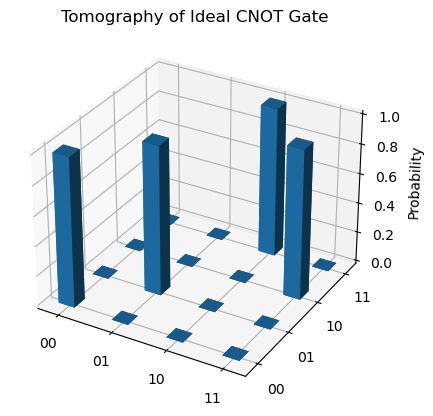

In [244]:
# show 3D histogram of the ideal CNOT gate
d = 0.15

fig = plt.figure(clear=True)
ax = fig.add_subplot(projection='3d')

plt.xticks(ticks=[0,1,2,3], labels=['00','01','10','11'])
plt.yticks(ticks=[0,1,2,3], labels=['00','01','10','11'])


ax.bar3d(x=np.array([0-d,0-d,0-d,0-d,1-d,1-d,1-d,1-d,2-d,2-d,2-d,2-d,3-d,3-d,3-d,3-d]), y=np.array([0-d,1-d,2-d,3-d,0-d,1-d,2-d,3-d,0-d,1-d,2-d,3-d,0-d,1-d,2-d,3-d]), z=np.zeros(16),
         dx=2*d, dy=2*d, dz=np.abs(idealCNOT).reshape(16))

plt.xlabel('')
plt.ylabel('')
ax.set_zlabel('Probability')
plt.title("Tomography of Ideal CNOT Gate")
plt.show()
#fig.savefig('images/idealCNOT.pdf')

# Perturbed CNOT gate

In [245]:
# integrate the time-dependent Schrodinger equation for the four base states

# initializations
BX = 1.0
BZ = -1.0*BX
BETA = 0.02*BZ

BX1 = BX
BZ1 = BZ
BX2 = BX
BZ2 = BZ
ECC = -0.1*np.abs(BZ)
BETA1 = BETA
BETA2 = BETA

tau1 = np.pi/(4*np.abs(ECC))
tau2 = np.pi/(2*np.abs(BZ))


ket00_t = np.array([1.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j])
ket01_t = np.array([0.0+0.0j,1.0+0.0j,0.0+0.0j,0.0+0.0j])
ket10_t = np.array([0.0+0.0j,0.0+0.0j,1.0+0.0j,0.0+0.0j])
ket11_t = np.array([0.0+0.0j,0.0+0.0j,0.0+0.0j,1.0+0.0j])


# apply Hadamard gate
ket00_t = np.matmul(idMDOTHad, ket00_t)
ket01_t = np.matmul(idMDOTHad, ket01_t)
ket10_t = np.matmul(idMDOTHad, ket10_t)
ket11_t = np.matmul(idMDOTHad, ket11_t)



# apply exp(i pi/4 sigmazDOTsigmaz)
# Bx = 0 = Bz
# E_CC ≠ 0
# tau1 = pi / (4 |E_CC|) if E_CC<0
# RungeKutta8 time integration

sol = integrate.solve_ivp(H2Q_noisy_divI, t_span=(0,tau1), y0=ket00_t, args=(0.0,0.0,0.0,0.0,ECC,BETA1,BETA2), method='DOP853')
ket00_t = sol.y[:,-1]

sol = integrate.solve_ivp(H2Q_noisy_divI, t_span=(0,tau1), y0=ket01_t, args=(0.0,0.0,0.0,0.0,ECC,BETA1,BETA2), method='DOP853')
ket01_t = sol.y[:,-1]

sol = integrate.solve_ivp(H2Q_noisy_divI, t_span=(0,tau1), y0=ket10_t, args=(0.0,0.0,0.0,0.0,ECC,BETA1,BETA2), method='DOP853')
ket10_t = sol.y[:,-1]

sol = integrate.solve_ivp(H2Q_noisy_divI, t_span=(0,tau1), y0=ket11_t, args=(0.0,0.0,0.0,0.0,ECC,BETA1,BETA2), method='DOP853')
ket11_t = sol.y[:,-1]



# apply Uz
# Bx = 0 = E_CC
# Bz ≠ 0
# tau2  = pi / (2 |Bz|) if Bz<0
# RungeKutta8 time integration

sol = integrate.solve_ivp(H2Q_noisy_divI, t_span=(tau1,tau1+tau2), y0=ket00_t, args=(0.0,BZ1,0.0,BZ2,0.0,BETA1,BETA2), method='DOP853')
ket00_t = sol.y[:,-1]

sol = integrate.solve_ivp(H2Q_noisy_divI, t_span=(tau1,tau1+tau2), y0=ket01_t, args=(0.0,BZ1,0.0,BZ2,0.0,BETA1,BETA2), method='DOP853')
ket01_t = sol.y[:,-1]

sol = integrate.solve_ivp(H2Q_noisy_divI, t_span=(tau1,tau1+tau2), y0=ket10_t, args=(0.0,BZ1,0.0,BZ2,0.0,BETA1,BETA2), method='DOP853')
ket10_t = sol.y[:,-1]

sol = integrate.solve_ivp(H2Q_noisy_divI, t_span=(tau1,tau1+tau2), y0=ket11_t, args=(0.0,BZ1,0.0,BZ2,0.0,BETA1,BETA2), method='DOP853')
ket11_t = sol.y[:,-1]



# apply Hadamard gate
ket00_t = np.matmul(idMDOTHad, ket00_t)
ket01_t = np.matmul(idMDOTHad, ket01_t)
ket10_t = np.matmul(idMDOTHad, ket10_t)
ket11_t = np.matmul(idMDOTHad, ket11_t)



# normalize vectors
ket00_t /= np.linalg.norm(ket00_t)
ket01_t /= np.linalg.norm(ket01_t)
ket10_t /= np.linalg.norm(ket10_t)
ket11_t /= np.linalg.norm(ket11_t)


# matrix representation of the perturbed CNOT gate
pertCNOT = np.array([ket00_t,ket01_t,ket10_t,ket11_t])
print(pertCNOT)

# compute fidelity of the perturbed CNOT gate
J = J_gate(np.array([[1+0.0j,0+0.0j,0+0.0j,0+0.0j],[0+0.0j,1+0.0j,0+0.0j,0+0.0j],[0+0.0j,0+0.0j,0+0.0j,1+0.0j],[0+0.0j,0+0.0j,1+0.0j,0+0.0j]]),pertCNOT)
print()
print("J_pert = ", J)

[[0.81243079-0.55212713j 0.10532392+0.15497974j 0.        +0.j
  0.        +0.j        ]
 [0.10532392+0.15497974j 0.81243079-0.55212713j 0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.15497974+0.10532392j
  0.55212713-0.81243079j]
 [0.        +0.j         0.        +0.j         0.55212713-0.81243079j
  0.15497974+0.10532392j]]

J_pert =  0.06899084237115205


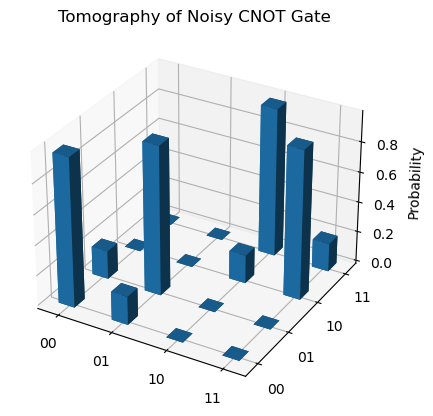

In [246]:
# show 3D histogram of the perturbed CNOT gate
d = 0.15

fig = plt.figure(clear=True)
ax = fig.add_subplot(projection='3d')

plt.xticks(ticks=[0,1,2,3], labels=['00','01','10','11'])
plt.yticks(ticks=[0,1,2,3], labels=['00','01','10','11'])


ax.bar3d(x=np.array([0-d,0-d,0-d,0-d,1-d,1-d,1-d,1-d,2-d,2-d,2-d,2-d,3-d,3-d,3-d,3-d]), y=np.array([0-d,1-d,2-d,3-d,0-d,1-d,2-d,3-d,0-d,1-d,2-d,3-d,0-d,1-d,2-d,3-d]), z=np.zeros(16),
         dx=2*d, dy=2*d, dz=np.abs(pertCNOT).reshape(16))

plt.xlabel('')
plt.ylabel('')
ax.set_zlabel('Probability')
plt.title("Tomography of Noisy CNOT Gate")
plt.show()
#fig.savefig('images/pertCNOT.pdf')

## Optimal control of CNOT gate
The control amplitudes are in the base of $\sigma_z^{(1)} \sigma_z^{(2)}$ and $\sigma_x^{(1,2)}$ <br>
freq$_{MAX}$ is chosen such that freq$_{MAX}=\frac{2\pi Nbe}{\tau}$, where $\tau=\tau_1+\tau_2$ is the total lenght of the pulse <br>
Optimization Hamiltonian $H = -\frac{1}{2} B_x^1 \sigma_x^{(1)} -\frac{1}{2} B_z^1 \sigma_z^{(1)} -\frac{1}{2} B_x^2 \sigma_x^{(2)} -\frac{1}{2} B_z^2 \sigma_z^{(2)} + E_{CC}\ \sigma_z^{(1)} \sigma_z^{(2)} + \beta \sigma_z^{(1)} + \beta \sigma_z^{(2)} + \left(- \frac{1}{2} B_z \right) \sum_{i=1}^{Nbe} [A_i \sin(\omega_i t) + B_i \cos(\omega_i t)] \sigma_z^{(1)} \otimes \sigma_z^{(2)} + B_x \sum_{i=1}^{Nbe} [C_i \sin(\omega_i t) + D_i \cos(\omega_i t)] \left( \sigma_x^{(1)} + \sigma_x^{(2)} \right)$

In [247]:
def H2Q_noisy_OC(t,Y,Bx1,Bz1,Bx2,Bz2,Ecc,Beta1,Beta2,freqq,ampp):

    """ Two-qubits Hamiltonian with Optimal Control
    
        t: time dependence of the function
        Y: function variable
        Bx1,Bz1,Bx2,Bz2,Ecc,Beta1,Beta2: function parameters
        freqq: OC frequencies
        ampp: OC amplitudes """
    
    global BX
    global BZ
    
    czz=0
    cx=0
    for k in range(freqq.shape[0]):
        czz += ampp[4*k]*np.sin(freqq[k]*t) + ampp[4*k+1]*np.cos(freqq[k]*t)
        cx += ampp[4*k+2]*np.sin(freqq[k]*t) + ampp[4*k+3]*np.cos(freqq[k]*t)
    
    S = H2Q_noisy(t,Y,Bx1,Bz1,Bx2,Bz2,Ecc,Beta1,Beta2) + (-0.5*BZ)*czz*np.matmul(sigmazDOTsigmaz,Y) + BX*cx*np.matmul(sigmaxDOTidM,Y) + BX*cx*np.matmul(idMDOTsigmax,Y)
    
    return S



def H2Q_noisy_OC_divI(t,Y,Bx1,Bz1,Bx2,Bz2,Ecc,Beta1,Beta2,freqq,ampp):
    
    """ Utility function to be used in time evolution 
        described by Schroedinger equation """
    
    return H2Q_noisy_OC(t,Y,Bx1,Bz1,Bx2,Bz2,Ecc,Beta1,Beta2,freqq,ampp)/(0.0+1.0j)

In [248]:
def J2Q_OC(ampp, par):
    """ This is the function to be minimized in the two-qubits Optimal-Control part
        It takes care of the time integration and gives as output a number between 0 and 1
        
        ampp: function variables
        par: function parameters = (Bx1,Bz1,Bx2,Bz2,Ecc,Beta1,Beta2,freq1,...freqN) """

    # initializations
    BX1 = par[0]
    BZ1 = par[1]
    BX2 = par[2]
    BZ2 = par[3]
    ECC = par[4]
    BETA1 = par[5]
    BETA2 = par[6]
    FREQ = par[7:]
    
    TAU1 = np.pi/(4*np.abs(ECC))
    TAU2 = np.pi/(2*np.abs(BZ1))
    
    ket00_t = np.array([1.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j])
    ket01_t = np.array([0.0+0.0j,1.0+0.0j,0.0+0.0j,0.0+0.0j])
    ket10_t = np.array([0.0+0.0j,0.0+0.0j,1.0+0.0j,0.0+0.0j])
    ket11_t = np.array([0.0+0.0j,0.0+0.0j,0.0+0.0j,1.0+0.0j])


    # apply Hadamard gate
    ket00_t = np.matmul(idMDOTHad, ket00_t)
    ket01_t = np.matmul(idMDOTHad, ket01_t)
    ket10_t = np.matmul(idMDOTHad, ket10_t)
    ket11_t = np.matmul(idMDOTHad, ket11_t)



    # apply exp(i pi/4 sigmazDOTsigmaz)
    # Bx = 0 = Bz
    # E_CC ≠ 0
    # tau = pi / (4 |E_CC|) if E_CC<0
    # RungeKutta8 time integration

    sol = integrate.solve_ivp(H2Q_noisy_OC_divI, t_span=(0,TAU1), y0=ket00_t, args=(0.0,0.0,0.0,0.0,ECC,BETA1,BETA2,FREQ,ampp), method='DOP853')
    ket00_t = sol.y[:,-1]

    sol = integrate.solve_ivp(H2Q_noisy_OC_divI, t_span=(0,TAU1), y0=ket01_t, args=(0.0,0.0,0.0,0.0,ECC,BETA1,BETA2,FREQ,ampp), method='DOP853')
    ket01_t = sol.y[:,-1]

    sol = integrate.solve_ivp(H2Q_noisy_OC_divI, t_span=(0,TAU1), y0=ket10_t, args=(0.0,0.0,0.0,0.0,ECC,BETA1,BETA2,FREQ,ampp), method='DOP853')
    ket10_t = sol.y[:,-1]

    sol = integrate.solve_ivp(H2Q_noisy_OC_divI, t_span=(0,TAU1), y0=ket11_t, args=(0.0,0.0,0.0,0.0,ECC,BETA1,BETA2,FREQ,ampp), method='DOP853')
    ket11_t = sol.y[:,-1]


    # apply Uz
    # Bx = 0 = E_CC
    # Bz ≠ 0
    # tau  = pi / (2 Bz) if Bz<0
    # RungeKutta8 time integration

    sol = integrate.solve_ivp(H2Q_noisy_OC_divI, t_span=(TAU1,TAU1+TAU2), y0=ket00_t, args=(0.0,BZ1,0.0,BZ2,0.0,BETA1,BETA2,FREQ,ampp), method='DOP853')
    ket00_t = sol.y[:,-1]

    sol = integrate.solve_ivp(H2Q_noisy_OC_divI, t_span=(TAU1,TAU1+TAU2), y0=ket01_t, args=(0.0,BZ1,0.0,BZ2,0.0,BETA1,BETA2,FREQ,ampp), method='DOP853')
    ket01_t = sol.y[:,-1]

    sol = integrate.solve_ivp(H2Q_noisy_OC_divI, t_span=(TAU1,TAU1+TAU2), y0=ket10_t, args=(0.0,BZ1,0.0,BZ2,0.0,BETA1,BETA2,FREQ,ampp), method='DOP853')
    ket10_t = sol.y[:,-1]

    sol = integrate.solve_ivp(H2Q_noisy_OC_divI, t_span=(TAU1,TAU1+TAU2), y0=ket11_t, args=(0.0,BZ1,0.0,BZ2,0.0,BETA1,BETA2,FREQ,ampp), method='DOP853')
    ket11_t = sol.y[:,-1]



    # apply Hadamard gate
    ket00_t = np.matmul(idMDOTHad, ket00_t)
    ket01_t = np.matmul(idMDOTHad, ket01_t)
    ket10_t = np.matmul(idMDOTHad, ket10_t)
    ket11_t = np.matmul(idMDOTHad, ket11_t)



    # normalize vectors
    ket00_t /= np.linalg.norm(ket00_t)
    ket01_t /= np.linalg.norm(ket01_t)
    ket10_t /= np.linalg.norm(ket10_t)
    ket11_t /= np.linalg.norm(ket11_t)

    
    
    # compute fidelity of the perturbed CNOT gate
    J = J_gate(np.array([[1+0.0j,0+0.0j,0+0.0j,0+0.0j],[0+0.0j,1+0.0j,0+0.0j,0+0.0j],[0+0.0j,0+0.0j,0+0.0j,1+0.0j],[0+0.0j,0+0.0j,1+0.0j,0+0.0j]]),np.array([ket00_t,ket01_t,ket10_t,ket11_t]))
    global J2Q_record
    J2Q_record = np.append(J2Q_record, J)
    
    return J

In [270]:
# initialize frequencies range and number of control amplitudes
Nbe = 5
print("number of pulses = ", Nbe)
tauMAX = tau1 + tau2
freqMAX = 2*np.pi*Nbe/tauMAX
print("max frequency (a.u.) = ", freqMAX)

# find Nbe random frequencies in the range
freq = np.array([])
for k in range(Nbe):
    wl = np.around(((freqMAX/Nbe)*(k+np.random.rand())), decimals=6)
    freq = np.append(freq, wl)
    
print("frequencies chosen = ", freq)
print()


# initialize control amplitudes in the form [sin1zz,cos1zz,sin1x,cos1x, sin2zz,....]
ampl = np.around((np.random.random_sample(4*Nbe) - 0.5), decimals=8)
print("initialization amplitudes = ")
print(ampl)

number of pulses =  5
max frequency (a.u.) =  3.3333333333333335
frequencies chosen =  [0.568943 0.829755 1.375009 2.5848   3.095438]

initialization amplitudes = 
[-0.35332923 -0.37944011  0.41798764 -0.05731314 -0.25084088 -0.33993644
 -0.45685471  0.42737722  0.10005522  0.24827733 -0.35691641  0.05371541
 -0.27573523 -0.37420997  0.34526843 -0.13061211  0.42545634  0.22828873
 -0.34801319  0.16754995]


In [271]:
# create a record to store all the values assumed by J in the optimization
J2Q_record = np.array([])


# start optimization

# manipulate args array
T=np.append([BX1,BZ1,BX2,BZ2,ECC,BETA1,BETA2],freq)

# minimize with respect to those parameters
opt = optimize.minimize(J2Q_OC, x0=ampl, args=T, method='Nelder-Mead', options={'maxiter': 6000, 'maxfev': 6000, 'adaptive': True, 'xatol': 0.001, 'fatol': 0.0001})
print(opt)
print()
opt_ampl = opt.x
print(opt_ampl)

 final_simplex: (array([[-0.18034385, -0.38241543,  0.10131158, -0.07347528, -0.15651393,
        -0.27821024, -0.20290611,  0.52588153,  0.25998452,  0.13818801,
        -0.8863042 ,  0.11471755, -0.8124797 , -0.48015863, -0.10188324,
         0.1690457 ,  0.07723445,  0.10464836, -0.82181816,  0.00852501],
       [-0.17997805, -0.38207231,  0.10135082, -0.07350716, -0.15655383,
        -0.27786695, -0.2028657 ,  0.52590748,  0.26011232,  0.1382074 ,
        -0.88630494,  0.11478329, -0.81291469, -0.48033939, -0.10227033,
         0.16916623,  0.07739114,  0.10441187, -0.82237936,  0.00843264],
       [-0.18070241, -0.38320953,  0.10129716, -0.07350247, -0.15622035,
        -0.27898535, -0.2027092 ,  0.5258104 ,  0.25996589,  0.13802824,
        -0.88636861,  0.11466312, -0.81240263, -0.47996551, -0.10190322,
         0.16902585,  0.07708884,  0.10458264, -0.82201824,  0.00854352],
       [-0.1802297 , -0.3823148 ,  0.10121815, -0.07351964, -0.15645671,
        -0.27848471, -0.2027213

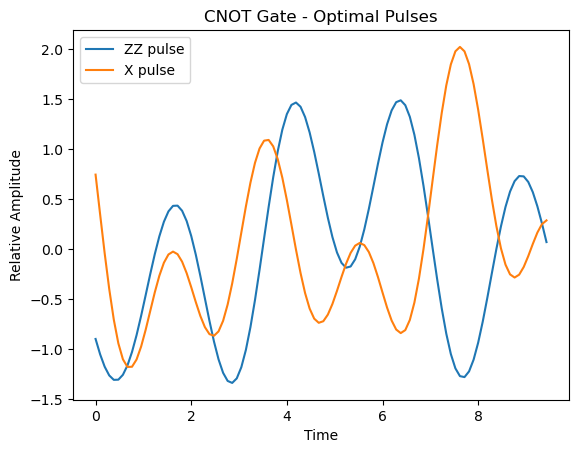

In [280]:
# show optimal pulse
x = np.linspace(0, tauMAX, 100)

y_czz = np.zeros(100)
y_cx = np.zeros(100)

for k in range(freq.shape[0]):
    y_buff = opt_ampl[4*k]*np.sin(freq[k]*x)
    y_czz = y_czz + y_buff
    y_buff = opt_ampl[4*k+1]*np.cos(freq[k]*x)
    y_czz = y_czz + y_buff
    
    y_buff = opt_ampl[4*k+2]*np.sin(freq[k]*x)
    y_cx = y_cx + y_buff
    y_buff = opt_ampl[4*k+3]*np.cos(freq[k]*x)
    y_cx = y_cx + y_buff
        
fig = plt.figure(clear=True) 
plt.plot(x, y_czz, label='ZZ pulse')
plt.plot(x, y_cx, label='X pulse')
plt.xlabel('Time')
plt.ylabel('Relative Amplitude')
plt.title("CNOT Gate - Optimal Pulses")
plt.legend()
plt.show()
#fig.savefig('images/CNOTpulse.pdf')

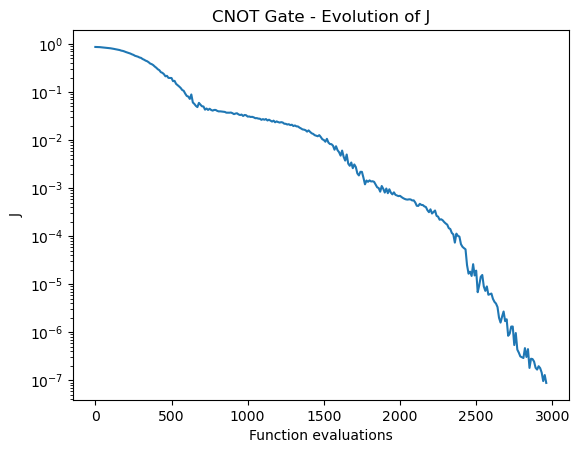

In [279]:
# choose step of visualization
st = 10
begin = 0
end = len(J2Q_record)


# show J evolution over iterations
x = np.arange(begin,end,st)

fig = plt.figure(clear=True) 
plt.yscale('log')
plt.plot(x, J2Q_record[begin:end:st], label='optimal')
plt.xlabel('Function evaluations')
plt.ylabel('J')
plt.title("CNOT Gate - Evolution of J")
plt.show()
#fig.savefig('images/CNOT_evolutionJ.pdf')